In [1]:
# install the package
!pip install pytrends

  Stored in directory: C:\Users\Lin\AppData\Local\pip\Cache\wheels\64\ae\af\51d48fbbca0563036c6f80999b7ce3f097fa591fd165047baf
Successfully built pytrends


### A few caveats to bear in mind with Google Trends
  - Google provides *sampled* data, so if you pull the same data twice there may be a small amount of variability.
  - The data is scaled, so that the maximum value in any requested dataset will be 100. So if you separately pull reports for different keywords, you won't be able to tell relative popularity between them (but you can pull multiple keywords at a time to compare their search interest directly).
  - The search interest values provided are NOT the same as search *volume*. They are search interest *relative to all Google searches* during the time period and geography you are requesting. Since the overall usage of Google has grown over the years, this means that a search term that has constant search *volume* will show up as having decreasing search *interest* over time (see section at end of notebook).


In [8]:
from pytrends.request import TrendReq

%matplotlib inline

# set a nice plotting style
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [46]:
with open('credentials.txt', 'r') as f:
    username, password = f.read().splitlines() 

# connector = TrendReq(username, password)
# issue: not able to sign in

# buildt the connector without signing in
connector = TrendReq(hl='en-US', tz=360)

### start searching
Build a payload and put the keywords that we want to track in it.

In [47]:
my_search_terms = ['clean beauty', 'green beauty', 'clean cosmetics']  # list with up to 5 items

connector.build_payload(my_search_terms)
df = connector.interest_over_time()

In [48]:
# return a Pandas DataFrame
df.head()

,clean beauty,green beauty,clean cosmetics,isPartial
date,,,,
2015-04-05,20,52,3,False
2015-04-12,23,47,2,False
2015-04-19,18,53,3,False
2015-04-26,15,47,6,False
2015-05-03,21,52,3,False


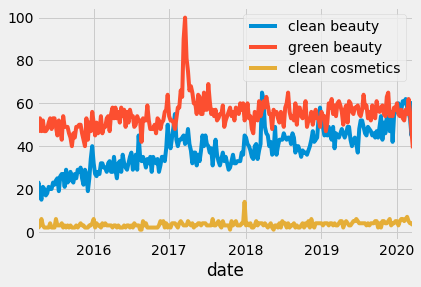

In [49]:
df.plot()

In [15]:
connector.build_payload?

### building advanced search
By default the `build_payload()` method will give you 5 years of worldwide data, with no filters applied on search type or category. The categories we may be interested in are as followed:
- Beauty & Fitness -> 44
- Face & Body Care -> 143
- Make-Up & Cosmetics -> 234
- Skin & Nail Care -> 93
- For other categories available, see [here](https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories)

Similary, the default setting of `gprop=''` gives you regular Web Search data. You can filter to other types of searches by setting `gprop` to:
- 'images'
- 'news'
- 'youtube'
- 'froogle' (Google Shopping)

Geography can be specified with the `geo` parameter, e.g. `geo='US'` will give you search interest in the U.S. In our case, we may want to use `geo='FR'`.

Timeframe is a bit tricky. If you need to be more specific than the default 5 year window, I recommend giving custom start and end dates. The structure for this is to set the `timeframe` parameter to a string with a space between start and end dates: `'yyyy-mm-dd yyyy-mm-dd'`.

In [50]:
# Google regular web searches for clean cosmetics in US for last three years
connector.build_payload(my_search_terms, geo='US', cat=234, timeframe='2018-03-31 2020-03-31')

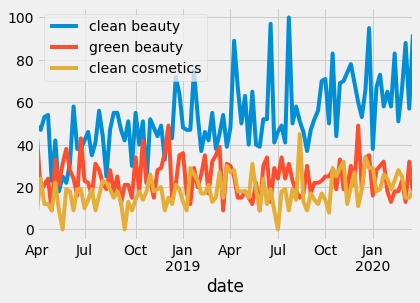

In [51]:
# see the line chart
df = connector.interest_over_time()
df.plot()

In [43]:
# Google regular web searches for clean cosmetics in France for last three years
my_search_terms = ['cosmétique propre', 'beauté verte', 'beauté propre']
connector.build_payload(my_search_terms, geo='FR', cat=234, timeframe='2018-03-31 2020-03-31')

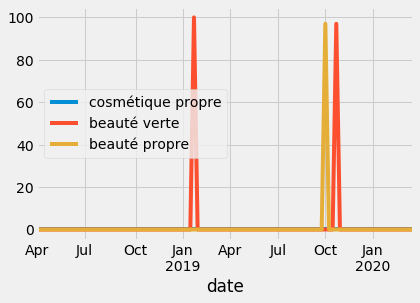

In [44]:
# see the line chart
df = connector.interest_over_time()
df.plot()

In [52]:
df_regional = connector.interest_by_region()
df_regional

,clean beauty,green beauty,clean cosmetics
geoName,,,
Alabama,64,36,0
Alaska,0,0,0
Arizona,67,33,0
Arkansas,100,0,0
California,61,23,16
Colorado,81,19,0
Connecticut,89,11,0
Delaware,0,0,0
District of Columbia,100,0,0


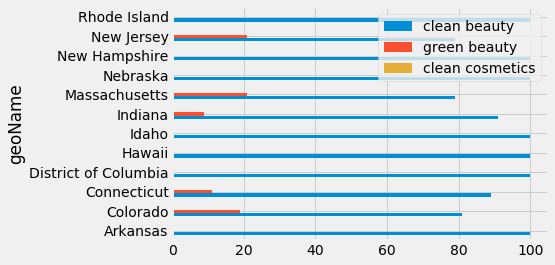

In [57]:
# see keyword "clean beauty" are more popular in which states
df_top_states = df_regional.loc[df_regional['clean beauty'] > df_regional['clean beauty'].quantile(0.75)]
df_top_states.plot.barh()

## Related search terms
Terms that are frequently searched for (in the same session) with the search term you provided. 
- `top` gives the most popular related terms in the same timeframe/geography.
- `rising` gives the terms that had the highest growth compared with the previous time period.

In [59]:
related = connector.related_queries()
related.keys()

dict_keys(['clean beauty', 'green beauty', 'clean cosmetics'])

In [60]:
related['clean beauty'].keys()

dict_keys(['top', 'rising'])

In [62]:
related['clean beauty']['top'].head(10)

,query,value
0,clean beauty blender,100
1,how to clean beauty blender,62
2,ulta clean beauty,23
3,clean a beauty blender,23
4,how to clean makeup brushes,21
5,how to clean a beauty blender,20
6,sephora clean beauty,17
7,clean makeup brands,16
8,best clean beauty products,10
9,how to clean makeup sponges,7


In [64]:
related['clean beauty']['rising'].head(10)

,query,value
0,clean makeup brands,151200
1,best clean beauty products,94700
2,how to clean makeup sponges,100
3,ulta clean beauty,90
4,sephora clean beauty,40


In [67]:
related_topics = connector.related_topics()
related_topics.keys()

dict_keys([])